# Projeto ICDR

Grupo: João Augusto, Giovanna Alvarino e Bruno Lopes
- 08/12/2021

## Introdução

O objetivo do trabalho consistiu em avaliar a conjuntura dos gastos com seguro de uma amostra composta por 1338 indivíduos, de forma a compreender como tal grandeza é delimitada pelos fatores: saúde, através do índice de massa corporal (IMC); idade; sexo e pela região onde o indivíduo reside. Os dados aqui manipulados foram obtidos de forma gratuita, com coleta eletrônica intermediada pela plataforma kaggle.

Pacotes Utilizados

In [ ]:
# Instalando os Pacotes necessários
install.packages('readr')
install.packages('ggplot2')
install.packages('fitdistrplus')
install.packages('data.table')
install.packages('tidyverse')

# Requerendo os pacores
library(readr)
library(ggplot2)
library(fitdistrplus)
library(data.table)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: MASS

Loading required package: survival

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.0      ✔ stringr 1.4.1 
✔ purrr   0.3.4      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last

### Manipulação dos dados

In [2]:
# Leitura de dados:
dados <- readr::read_csv(file = "insurance2.csv", skip = 0, 
                       locale = locale(encoding = "latin1"))

Rows: 1338 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): sex, smoker, region
dbl (4): age, bmi, children, charges

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# Alterando a nomenclatura das variáveis:
names(dados) <- c("Idade","Sexo","IMC","Filhos","Fumante","Região","Despesas")

In [4]:
# Analisando a estrutura dos dados por meio da função glimpse:
glimpse(dados)

Rows: 1,338
Columns: 7
$ Idade    <dbl> 19, 18, 28, 33, 32, 31, 46, 37, 37, 60, 25, 62, 23, 56, 27, 1…
$ Sexo     <chr> "Feminino", "Masculino", "Masculino", "Masculino", "Masculino…
$ IMC      <dbl> 27.900, 33.770, 33.000, 22.705, 28.880, 25.740, 33.440, 27.74…
$ Filhos   <dbl> 0, 1, 3, 0, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0…
$ Fumante  <chr> "Sim", "Não", "Não", "Não", "Não", "Não", "Não", "Não", "Não"…
$ Região   <chr> "Sudoeste", "Sudeste", "Sudeste", "Noroeste", "Noroeste", "Su…
$ Despesas <dbl> 16884.924, 1725.552, 4449.462, 21984.471, 3866.855, 3756.622,…


In [5]:
# Estatística descritiva das variáveis
summary(dados)

     Idade           Sexo                IMC            Filhos     
 Min.   :18.00   Length:1338        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
   Fumante             Região             Despesas    
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9382  
                                       Mean   :13270  
                                       3rd Qu.:16640  
                                       Max.   :63770  

## Desenvolvimento

Este trabalho inicia com uma análise quantitativa a respeito da grandeza definida como variável a ser discriminada em função de aspectos inerentes às características de indivíduos cobertos por determinada seguradora. Ressalta-se que a variável descrita corresponde ao conjunto de despesas gerado por um total de 1338 clientes segurados.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



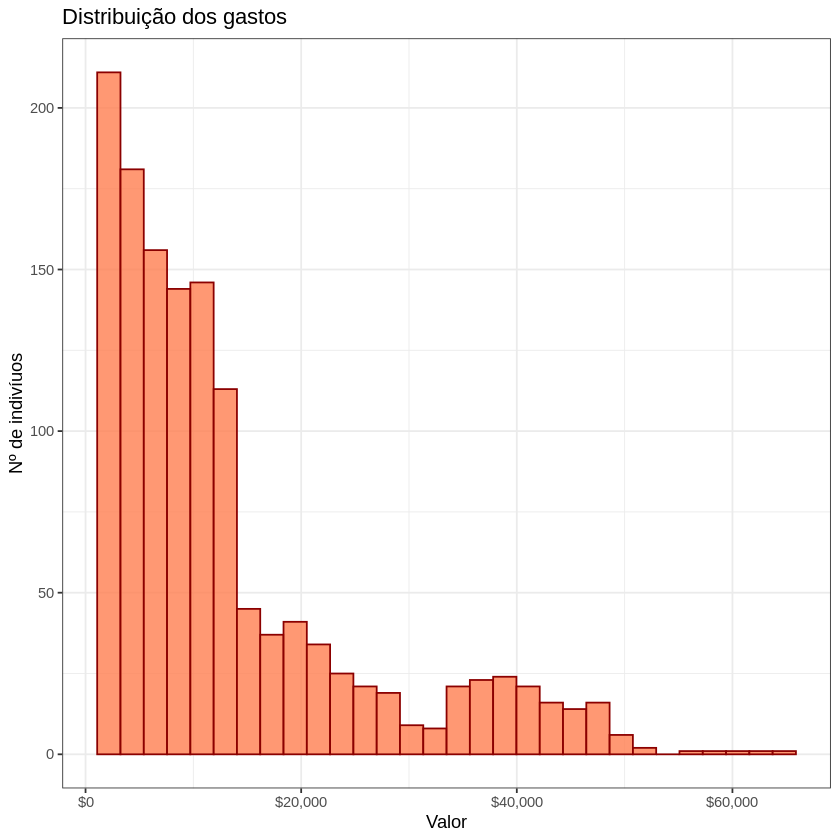

In [6]:
# Distribuição da variável de despesas:

ggplot(dados) +
geom_histogram(aes(x = Despesas), color = "darkred",
               fill ="coral", alpha =.8)+
scale_x_continuous(labels = scales::dollar) +
labs(x = "Valor", y = "Nº de indivíuos", title = "Distribuição dos gastos")+
theme_bw()

Por meio do histograma apresentado, é possível analisar como se distribuem os dados. Observa-se um comportamento assimétrico positivo dos elementos, distanciando-se notavelmente de uma normal.

Visando otimizar essas informações, os dados foram submetidos a um processo de modelagem, onde foram estimados parâmetros pelo método da máxima-verosimilhança assumindo que os valores dos gastos seguem distribuições que apresentam circunstâncias semelhantes ao da distribuição empírica: gama, weibull e log-normal:

In [7]:
fitg <- fitdist(dados$Despesas/100, "gamma")
fitw <- fitdist(dados$Despesas/100, "weibull")
fitln <- fitdist(dados$Despesas/100, "lnorm")

gofstat(list(fitg,fitw, fitln), fitnames = c("Gama","Weibull", "LogNormal"))

Goodness-of-fit statistics
                                    Gama     Weibull LogNormal
Kolmogorov-Smirnov statistic  0.07731892  0.08443158 0.0365844
Cramer-von Mises statistic    1.81881952  1.95821003 0.3973136
Anderson-Darling statistic   12.26054901 13.59794923 3.9424972

Goodness-of-fit criteria
                                   Gama  Weibull LogNormal
Akaike's Information Criterion 15672.74 15703.88  15600.15
Bayesian Information Criterion 15683.14 15714.28  15610.55

Submetendo essas considerações à testes estatísticos, ao avaliar a estatística do kolmogorov-sminorv test, dada a sua hipótese nula de que os dados seguem a distribuição especificada (RAZALI E WAH, 2011), assumindo um nível de significância de 5%, pode-se afirmar sobre igualdade estatística entre a distribuição empírica e as distribuições teóricas Gama e Weibull. Contudo, ao observar os valores para os AIC e BIC, a distribuição gama pode ser definida como detentora do melhor ajuste aos dados de despesas com seguro.

### Analisando o conjunto de variáveis descritivas em função de despesas:

#### 1) IMC

In [8]:
# Definindo classificações de acordo com o IMC:

IMCbreaks <- c(0,18.5,25,30,35,40,70)
IMClabels <- c("Abaixo do peso","Peso Normal","Sobrepeso","Obesidade Grau I", "Obesidade Grau II", "Obesidade Grau III")


setDT(dados)[ , FaixaIMC := cut(dados$IMC, 
                                   breaks = IMCbreaks, 
                                   right = FALSE, 
                                   labels = IMClabels)]

Com a delimitação da variável IMC de acordo com as classificações: abaixo do peso, peso normal, sobrepeso, obesidade grau I, obesidade grau II e obesidade grau III, visualizou-se a quantidade de usuários existentes por classificação.

In [9]:
# Usuários por classificação:

dados %>%
  group_by(FaixaIMC) %>%
  count() %>%
  arrange(desc(n))

FaixaIMC,n
<fct>,<int>
Obesidade Grau I,391
Sobrepeso,386
Peso Normal,225
Obesidade Grau II,225
Obesidade Grau III,91
Abaixo do peso,20


In [10]:
# Análise das despesas junto ao IMC dos segurados:

Despesas_FaixaIMC <- dados %>%
  select(FaixaIMC, Despesas) %>%
  group_by(FaixaIMC) %>%
  summarise(Média_DespesasIMC = mean(Despesas)) %>%
  arrange(desc(Média_DespesasIMC))

Despesas_FaixaIMC

FaixaIMC,Média_DespesasIMC
<fct>,<dbl>
Obesidade Grau II,17022.259
Obesidade Grau III,16784.616
Obesidade Grau I,14419.675
Sobrepeso,10987.510
Peso Normal,10409.338
Abaixo do peso,8852.201


Foi demonstrado que os indivíduos inseridos nas classificações: obesidade grau II, III e I, respectivamente, são detentores das maiores médias de dispêndios, mesmo considerando que apenas a obesidade grau I destacou-se entre as outras classificações em termos de quantidade de indivíduos. Ressalta-se que os maiores volumes médios de despesas por IMC provêm dos segurados com obesidade grau II. Numa comparação com o volume médio de gastos anuais obtidos entre a classificação mais dispendiosa e a classificação referente às pessoas com peso normal, indivíduos que possuem obesidade de grau II auferem mais 64% de gastos médios obtidos com segurados que se encaixam no peso considerado normal.

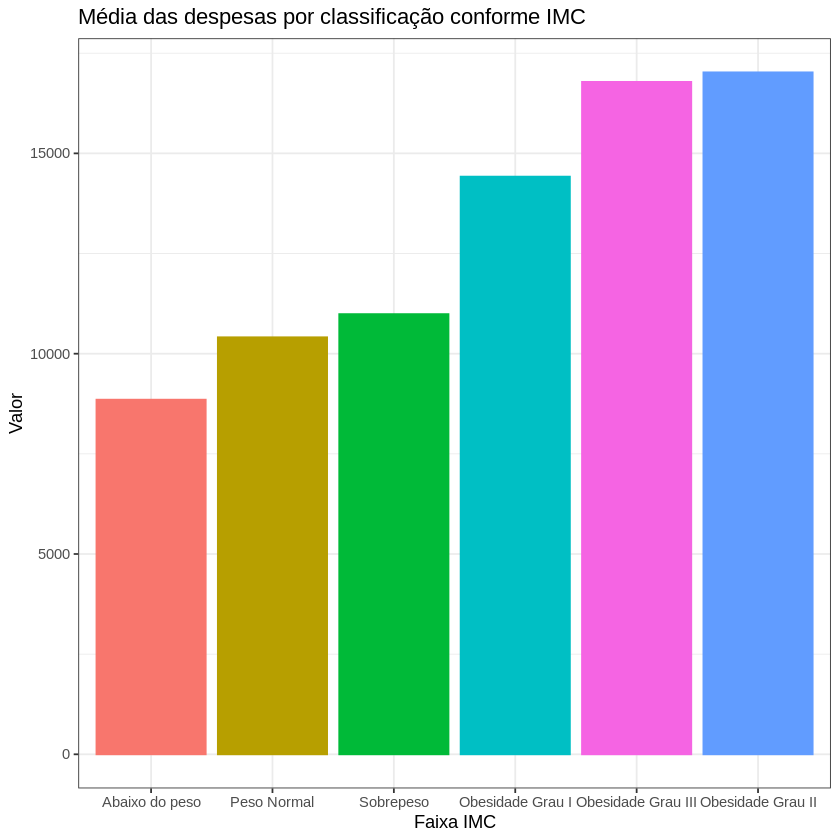

In [11]:
# Para visualização dessa conjuntura graficamente, tem-se:

dados %>%
  group_by(FaixaIMC) %>%
  summarise(Media_DespesasIMC = mean(Despesas)) %>%
  ggplot() +
  geom_col(aes(x = reorder(FaixaIMC, Media_DespesasIMC), y = Media_DespesasIMC,
               color = FaixaIMC, fill = FaixaIMC),
           show.legend = FALSE) +
  labs(x = "Faixa IMC", y = "Valor",
       title = "Média das despesas por classificação conforme IMC") +
  
  theme_bw()

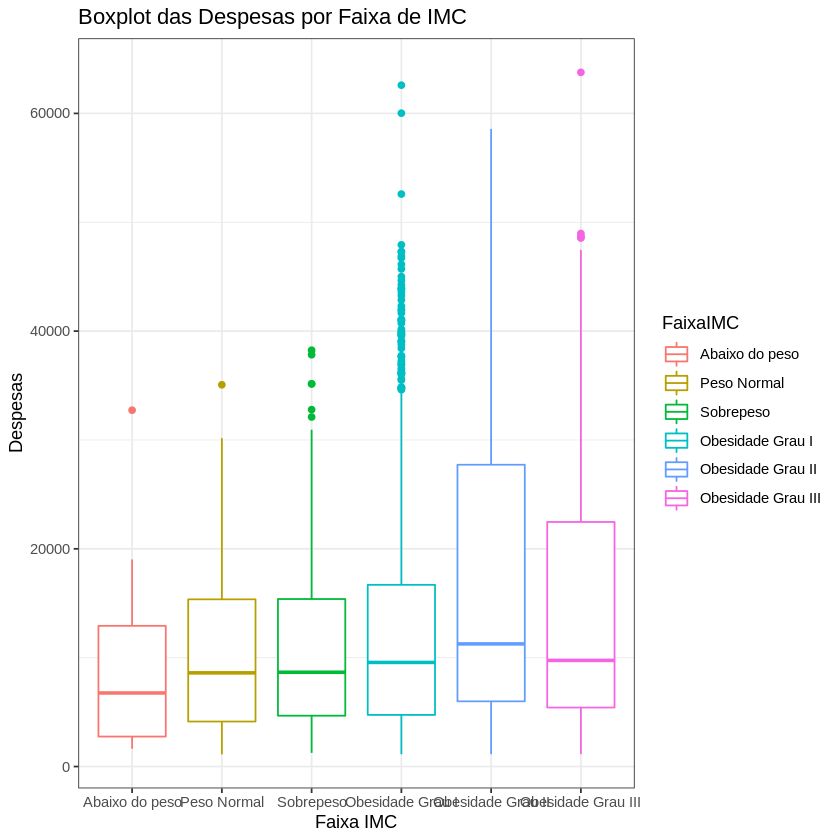

In [12]:
# BoxPlot:

dados %>% 
  ggplot(aes(x=FaixaIMC, y=Despesas))+
  geom_boxplot(aes(color=FaixaIMC))+
  labs(x="Faixa IMC", y="Despesas", title = "Boxplot das Despesas por Faixa de IMC") +
  theme_bw()

O boxplot é um excelente gráfico para identificar outliers entre os dados, ou seja, observar dados consideradas discrepantes. Além disso, com essa ferramenta é possível observar de maneira intuitiva o limite superior, inferior, primeiro e segundo quartil, mediana, além da distribuição e simetria das variáveis. Esse boxplot foi feito para as despesas, levando em consideração as faixas de IMC. Desssa forma pode-se observar algumas informações:

As “bolinhas” que aparecem acima da caixa são os outliers .A variável despesa possui outliers para todas as faixas de IMC, isso significa que essa feature possui várias observações que destoam do padrão.

A faixa de IMC identificada como “Obesidade Grau II” possui a maior variabilidade enre os dados, pois a distância entre o limite inferior (primeiro quartil) e limite superior (terceiro quartil) é a maior em relação as outras. Isso significa que os dados não estão distribuídos em torno de um valor comum. Essa faixa de IMC também apresenta a maior assimetria, pois a mediana não está localizada no centro da caixa, ou seja, A maior parte das observações se encontra acima da mediana, métrica que divide os dados ao meio.

#### 2) Idade

In [13]:
# Criando a faixa etária:

Idadesbreaks <- c(0,18,24,29,34,39,44,49,54,59,100)
Idadeslabels <- c("0 a 18","19 a 23","24 a 28","29 a 33","34 a 38","39 a 43","44 a 48","49 a 53","54 a 58","59 ou +")


setDT(dados)[ , FaixaEtaria := cut(dados$Idade, 
                                        breaks = Idadesbreaks, 
                                        right = FALSE, 
                                        labels = Idadeslabels)]

Com a delimitação da variável idade de acordo com a faixa etária, foi possível apurar a quantidade de usuários existentes por intervalos de idade, permitindo uma avaliação estratificada da amostra.

In [14]:
# Usuários por faixa:

dados %>%
  group_by(FaixaEtaria) %>%
  count() %>%
  arrange(desc(n))

FaixaEtaria,n
<fct>,<int>
19 a 23,250
44 a 48,143
49 a 53,143
24 a 28,140
59 ou +,139
29 a 33,133
39 a 43,133
54 a 58,131
34 a 38,126


In [15]:
# Análise das despesas junto às idades dos segurados:

Despesas_FaixaEtaria <- dados %>%
          select(FaixaEtaria, Despesas) %>%
          group_by(FaixaEtaria) %>%
          summarise(Madia_DespesasFE = mean(Despesas)) %>%
          arrange(desc(Madia_DespesasFE))

Despesas_FaixaEtaria

FaixaEtaria,Madia_DespesasFE
<fct>,<dbl>
59 ou +,20824.973
54 a 58,16112.831
49 a 53,15681.948
44 a 48,15458.204
39 a 43,13126.485
34 a 38,12244.518
29 a 33,10986.590
24 a 28,9574.819
19 a 23,8828.033


Com o cálculo da média de gastos por faixa, conclui-se que apesar dos jovens de 19 a 23 anos representar a maior massa segurada para a amostra avaliada, a faixa etária de 59 ou + foi a que mais auferiu despesas. De acordo com Solange Beatriz Palheiro Mendes, presidente da Federação Nacional de Saúde Suplementar (FenaSaúde) Os idosos sofrem mais de doenças crônicas (como hipertensão e diabetes), que exigem acompanhamento médico constante, e de males que demandam exames mais sofisticados e custosos”. Para se ter ideia do impacto na Saúde Suplementar, um paciente com menos de 18 anos custa ao ano 1.500 para seu plano de saúde, enquanto um com mais de 80 pode gerar gastos de 19 mil por ano, de acordo com dados do Instituto de Estudos da Saúde Suplementar (IESS). O custo assistencial médio por beneficiário dos 54 aos 58 anos é de 3.988,23, enquanto que, a partir dos 59 anos, sobe para 8.036,35 (mais que o dobro).

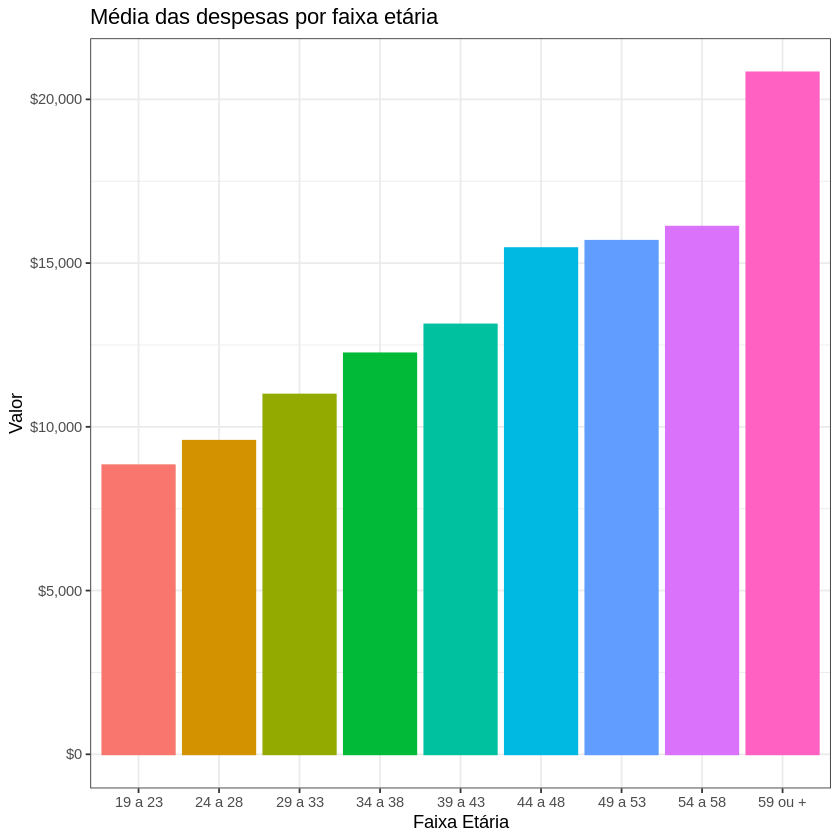

In [16]:
# Visualizando a situação graficamente:

dados %>%
  group_by(FaixaEtaria) %>%
  summarise(Media_Despesas = mean(Despesas)) %>%
  ggplot() +
  geom_col(aes(x = reorder(FaixaEtaria, Media_Despesas), y = Media_Despesas,
               color = FaixaEtaria, fill = FaixaEtaria),
           show.legend = FALSE) +
  scale_y_continuous(labels = scales::dollar) +
  labs(x = "Faixa Etária", y = "Valor",
       title = "Média das despesas por faixa etária") +

  theme_bw()

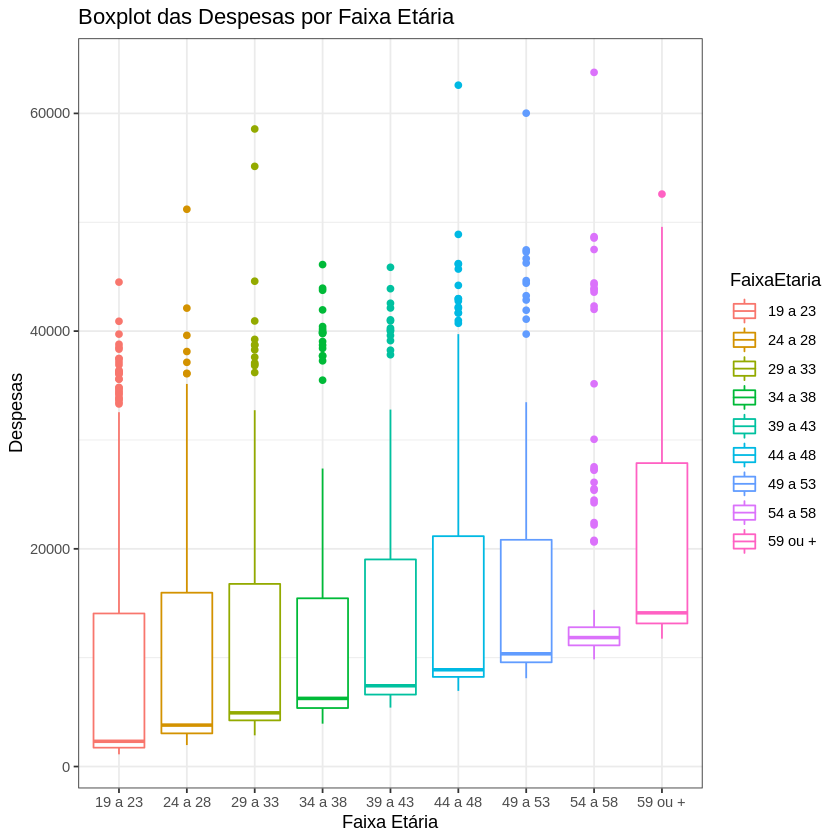

In [17]:
# Boxplot:

dados %>% 
  ggplot(aes(x=FaixaEtaria, y=Despesas))+
  geom_boxplot(aes(color=FaixaEtaria))+
  labs(x="Faixa Etária", y="Despesas", title = "Boxplot das Despesas por Faixa Etária") +
  theme_bw()

Para Faixa Etária, o boxplot relata que todas as faixas possuem observações fora do padrão dos dados. Adicionalmente, todas as faixas de idade, com exceção 54 a 58 anos, apresentaram grande dispersão e baixa simetria com valores que parecem não flutuar em torno de um valor de referência.

#### 3) Sexo

In [18]:
# Usuários por sexo:

dados %>%
  group_by(Sexo) %>%
  count() %>%
  arrange(desc(n))

Sexo,n
<chr>,<int>
Masculino,676
Feminino,662


In [19]:
# Análise das despesas junto ao sexo dos segurados:

Despesas_Sexo <- dados %>%
          select(Sexo, Despesas) %>%
          group_by(Sexo) %>%
          summarise(Media_Despesas_Sexo = mean(Despesas)) %>%
          arrange(desc(Media_Despesas_Sexo))

Despesas_Sexo

Sexo,Media_Despesas_Sexo
<chr>,<dbl>
Masculino,13956.75
Feminino,12569.58


Foram constatados valores semelhantes entre o volume de segurados masculinos e femininos, assim como para a média de despesas obtida junto à variável categórica de sexo.

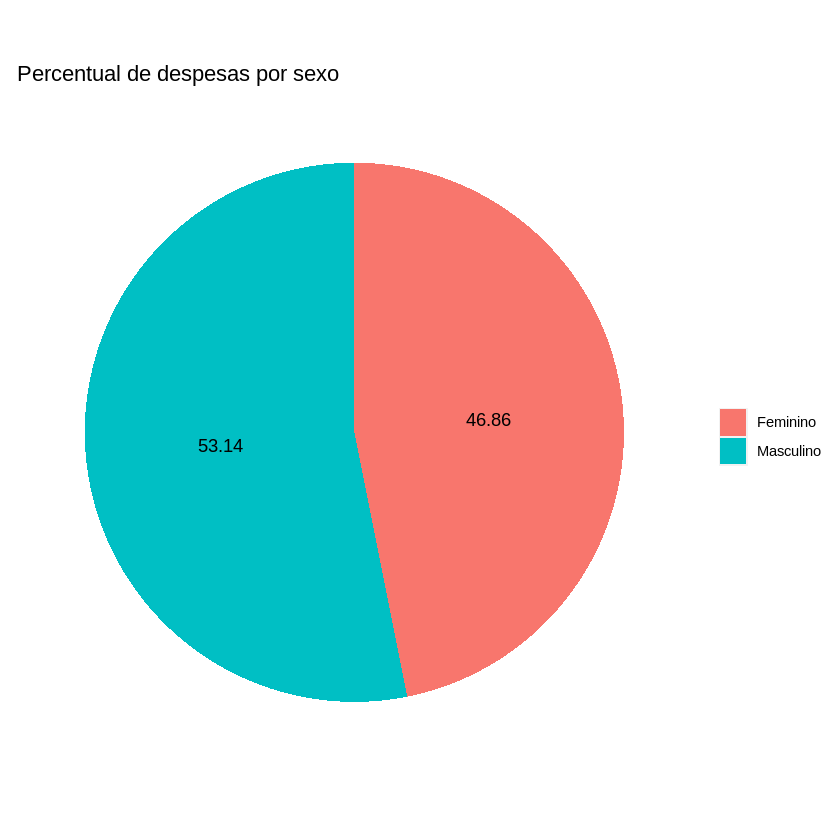

In [20]:
# Análise gráfica da situação:

sexo <- dados %>%
    group_by(Sexo)%>%
    summarize(Media_Despesas = sum(Despesas))%>%
    mutate(Prop = 100*round(Media_Despesas/ sum(Media_Despesas),4))


graf_sexo <- 
    ggplot(sexo, aes(x ="", y=Media_Despesas, fill=Sexo)) + 
    geom_bar(width = 1, stat = "identity") + 
    coord_polar("y", start = 0, direction = -1) + 
    theme(
      axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      panel.border = element_blank(),
      panel.grid=element_blank(),
      axis.ticks = element_blank(),
      panel.background = element_blank(),
      axis.text.x=element_blank(),
      legend.title = element_blank()) + 
    geom_text(data = sexo, 
              aes(x ="", y=Media_Despesas, label = Prop),
              position = position_stack(vjust = 0.5)) +
    labs(title = "Percentual de despesas por sexo") 

graf_sexo

O gráfico de pizza plotado demonstra a semelhança entre as médias de gastos por sexo em termos percentuais. O sexo masculino é detentor de um volume médio de gastos levemente mais elevado, representando 53,14% da totalidade.

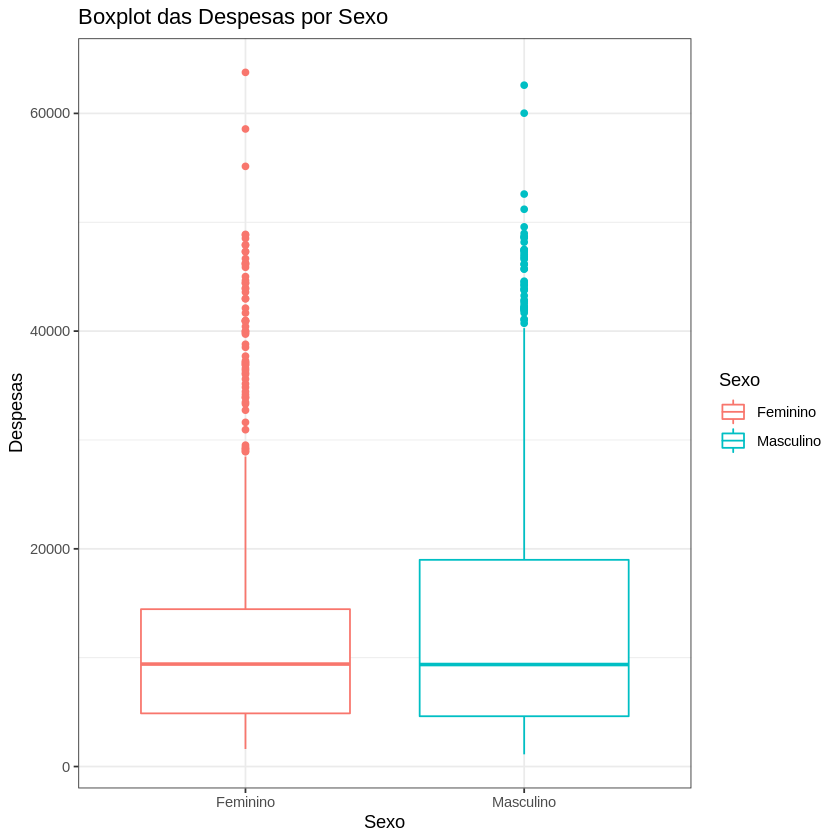

In [21]:
# Boxplot:

dados %>% 
  ggplot(aes(x=Sexo, y=Despesas))+
  geom_boxplot(aes(color=Sexo))+
  labs(x="Sexo", y="Despesas", title = "Boxplot das Despesas por Sexo") +
  theme_bw()

O Boxplot das Despesas em relação ao sexo mostra que os indivíduos do sexo masculino apresentam despesas com menor dispesão e mais assimétrica quando comparado aos indivíduos do sexo masculino. Os indivíduos do sexo masculino apresentam a maior parte das suas despesas acima da mediana.

#### 4) Região

Nesta seção, o foco de análise consistiu na variável categórica que infere sobre as regiões onde residem os segurados: Nordeste, Noroeste, Sudeste e Sudoeste.

In [22]:
# Usuários por região:

dados %>%
  group_by(Região) %>%
  count() %>%
  arrange(desc(n))

Região,n
<chr>,<int>
Sudeste,364
Noroeste,325
Sudoeste,325
Nordeste,324


In [23]:
# Análise das despesas junto à região onde residem os segurados:

Despesas_Regiao <- dados %>%
          select(Região, Despesas) %>%
          group_by(Região) %>%
          summarise(Media_Regiao = mean(Despesas)) %>%
          arrange(desc(Media_Regiao))

Despesas_Regiao

Região,Media_Regiao
<chr>,<dbl>
Sudeste,14735.41
Nordeste,13406.38
Noroeste,12417.58
Sudoeste,12346.94


A partir da análise das informações concernentes às médias de despesas por região, observa-se certa homogeneidade entre os montantes evidenciados. O Sudeste destacou-se como a região onde residem os segurados que apresentam maior gasto médio anual para a seguradora, enquanto os indivíduos que residem no Sudoeste e no Noroeste apresentam as menores médias de dispêndios.

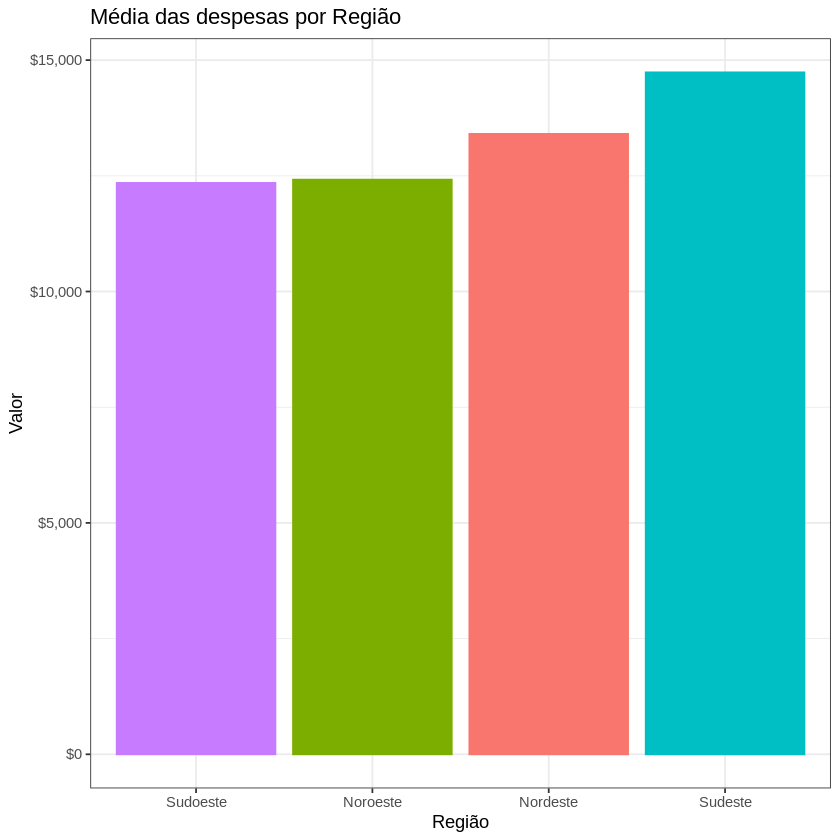

In [24]:
# Graficamente, observa-se:

dados %>%
  group_by(Região) %>%
  summarise(Media_Despesas = mean(Despesas)) %>%
  ggplot() +
  geom_col(aes(x = reorder(Região, Media_Despesas), y = Media_Despesas,
               color = Região, fill = Região),
           show.legend = FALSE) +
  scale_y_continuous(labels = scales::dollar) +
  labs(x = "Região", y = "Valor",
       title = "Média das despesas por Região") +
  theme_bw()

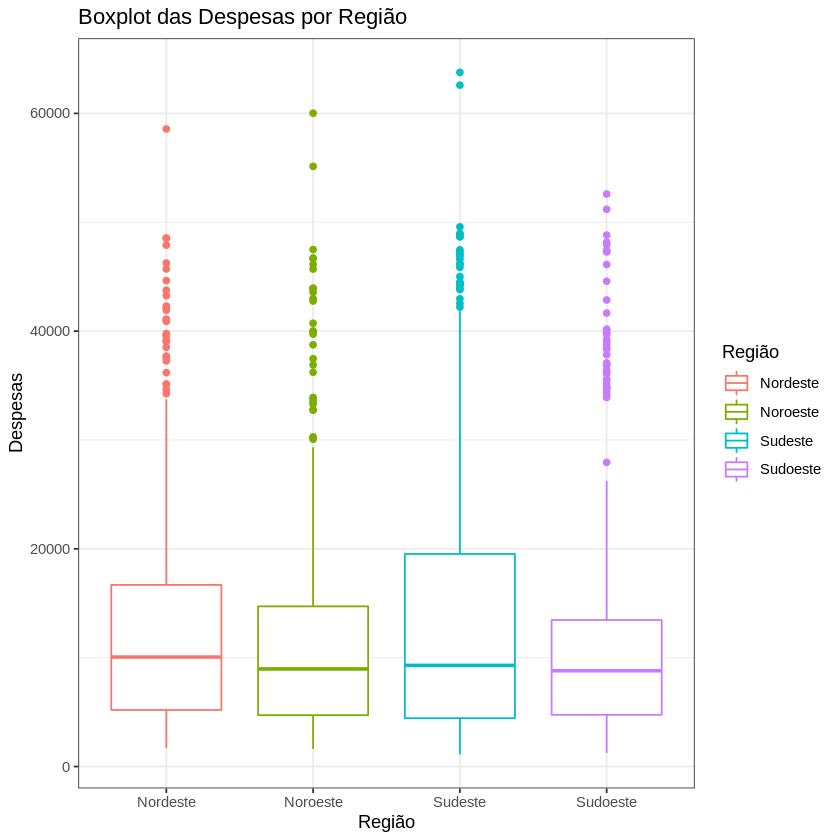

In [25]:
# Boxplot:

dados %>% 
  ggplot(aes(x=Região, y=Despesas))+
  geom_boxplot(aes(color=Região))+
  labs(x="Região", y="Despesas", title = "Boxplot das Despesas por Região") +
  theme_bw()

Todas as regiões apresentam outliers, sendo Sudeste a que apresenta maior assimetria e dispersão. Em contrapartida, Sudoeste apresenta a mediana no centro da caixa, demonstrando ter a distribuição mais simétrica e menos dispersa entre todas.

## Conclusão

O presente trabalho, ao desenvolver uma análise descritiva acerca da influência de um conjunto de fatores sobre o comportamento dos custos anuais com clientes do mercado segurador, forneceu um levantamento a respeito de implicações relevantes que determinadas características individuais de entes segurados exercem numa métrica de despesas anuais sob ótica do segurador. Observou-se a capacidade que a saúde, idade, sexo e região onde um segurado reside possuem em discriminar um dos componentes de maior interesse para análise da sustentabilidade de uma entidade seguradora, suas despesas.

Em síntese, após definir a variável de custos anuais de uma seguradora com uma amostra extensa de segurados como medida a ser avaliada em função de um conjunto de variáveis explicativas inerentes às características dessa amostra, foi evidenciado que:

No caso das métricas de IMC e idade das pessoas seguradas, um maior volume de concentração de indivíduos em determinada categoria não pressupõe que tal categoria seja classificada como detentora dos maiores montantes médios de gastos para a seguradora.

Já paras os casos do sexo e região de residência dos clientes, observou-se um cenário distinto: há uma semelhança bem mais expressiva entre o volume de indivíduos e a média de dispêndios por categoria.

## Referências 

ENVELHECIMENTO da população brasileira impacta em aumento de despesas para os planos de saúde: Custo assistencial dos idosos, público que mais cresce nas empresas do setor, é muito superior ao dos jovens. FenaSaúde, 28 jul. 2018. Disponível em: https://fenasaude.org.br/noticias/envelhecimento-da-populacao-brasileira-impacta-em-aumento-de-despesas-para-os-planos-de-saude.html. Acesso em: 7 dez. 2021.

INSURANCE data. Kaggle: Alessiomonino, 2019. Disponível em: https://www.kaggle.com/monino/insurance-data. Acesso em: 29 nov. 2021.

RAZALI, N. M., & WAH, Y. B. Power Comparisons of Shapiro-Wilk, Kolmogorov-Smirnov, Lilliefors and Anderson-Darling Tests. Journal of Statistical Modeling and Anlytics, v. 2, p. 21-33, 2011.